# Project Python Foundations: Zomato Data Analysis

**Marks: 25**

**Time: 2.5 Hours**

### Context

The number of restaurants in India is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company Zomato offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
#Using Anaconda
#So below code is #ed
#
#from google.colab import drive
#drive.mount ("/gdrive")
#
#%cd /gdrive/My Drive/NSArrows/

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/NSArrows


In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [4]:
# read the data
df = pd.read_csv(r"C:\Users\njoshi3\Desktop\DS POC\Zomato_order.csv")

# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Toast & Tonic,Andhra,307.5,Weekend,Not given,25,20
1,1477685,358141,Bomra's Izakaya,Bengali,120.8,Weekend,Not given,25,23
2,1477070,66393,Gunpowder,Tamil,122.3,Weekday,5,23,28
3,1477334,106968,Mughal Mahal,Punjabi,292.0,Weekend,3,25,15
4,1478249,76942,Toast & Tonic,Punjabi,115.9,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** Write the code to check the shape of the dataset and write your observations based on that. (0.5 mark)

In [5]:
# Write your code here
df.shape

(1898, 9)

#### Observations:#
Shape of Zometo has 1898 rows and 9 columns.


### Question 2: Write the observations based on the below output from the info() method. (0.5 mark)

In [6]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
order_id                 1898 non-null int64
customer_id              1898 non-null int64
restaurant_name          1898 non-null object
cuisine_type             1898 non-null object
cost_of_the_order        1898 non-null float64
day_of_the_week          1898 non-null object
rating                   1898 non-null object
food_preparation_time    1898 non-null int64
delivery_time            1898 non-null int64
dtypes: float64(1), int64(4), object(4)
memory usage: 133.5+ KB


#### Observations:
Order_Id, Customer_Id, Food_Preparation Time and Delivery_Time are integers
Restaurant_Name, Cuisine_TYpe, Day_of_the_week and rating are object type
cost_of_the_order is float
1898 rows shows that it has all non-null but rating is NOT GIVEN in many rows which should be BLANK to treat as NULL
Memory usage is 133.5+kb.

### Question 3: 'restaurant_name', 'cuisine_type', 'day_of_the_week' are object types. Write the code to convert the mentioned features to 'category' and write your observations on the same. (0.5 mark)

In [64]:
# Coverting "objects" to "category" reduces the data space required to store the dataframe
# write the code to convert 'restaurant_name', 'cuisine_type', 'day_of_the_week' into categorical data
# Use info() to print a concise summary of the DataFrame
df.info()
df = df.astype({"restaurant_name":'category',"cuisine_type":'category',"day_of_the_week":'category'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
order_id                 1898 non-null int64
customer_id              1898 non-null int64
restaurant_name          1898 non-null object
cuisine_type             1898 non-null object
cost_of_the_order        1898 non-null float64
day_of_the_week          1898 non-null object
rating                   1898 non-null object
food_preparation_time    1898 non-null int64
delivery_time            1898 non-null int64
dtypes: float64(1), int64(4), object(4)
memory usage: 133.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
order_id                 1898 non-null int64
customer_id              1898 non-null int64
restaurant_name          1898 non-null category
cuisine_type             1898 non-null category
cost_of_the_order        1898 non-null float64
day_of_the_week          1898 non-null category
rating                   1898 no

#### Observations: 
Memory usage reduced from 133.6+kb to 96.8+kb.


### **Question 4:** Write the code to find the summary statistics and write your observations based on that. (1 mark)

In [20]:
# Write your code here
dfstat = df.copy()
dfstat.info()
dfstat = dfstat.drop(['order_id','customer_id'],axis=1)
dfstat.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
order_id                 1898 non-null int64
customer_id              1898 non-null int64
restaurant_name          1898 non-null object
cuisine_type             1898 non-null object
cost_of_the_order        1898 non-null float64
day_of_the_week          1898 non-null object
rating                   1898 non-null object
food_preparation_time    1898 non-null int64
delivery_time            1898 non-null int64
dtypes: float64(1), int64(4), object(4)
memory usage: 133.5+ KB


,cost_of_the_order,food_preparation_time,delivery_time
count,1898.000000,1898.000000,1898.000000
mean,164.988514,27.371970,24.161749
std,74.838121,4.632481,4.972637
min,44.700000,20.000000,15.000000
25%,120.800000,23.000000,20.000000
50%,141.400000,27.000000,25.000000
75%,222.975000,31.000000,28.000000
max,354.100000,35.000000,33.000000


#### Observations: 
Order Id and Customer Id are integers but can be easily dropped considering they are only Id and not having any impact on df even if we drop them. 
After that when we take statistics, it shows statistics of all integers/floats like Cost_Of_The_Order, Food_Preparation_Time and Delivery_Time.


### **Question 5:** How many orders are not rated? (0.5 mark)

In [7]:
# Write the code here
df  = pd.read_csv(r"C:\Users\njoshi3\Desktop\DS POC\Zomato_order.csv")
df = df.astype({"restaurant_name":'category',"cuisine_type":'category',"day_of_the_week":'category'})
#
# Creating DFRATING dataframe having all records where "rating = Not give"
#
dfrating = df[df["rating"]=="Not given"]
#
# Printing Shape, Total number of orders not Rated
#
print("Total Records WIth Rating Not Given : ",dfrating.shape[0])
#
# print(dfrating[dfrating["rating"]=="Not given"].count())
# print(dfrating.groupby(["rating"]).count())
# From original Datafram DF
# print(df[df["rating"]=="Not given"].count())
#

Total Records WIth Rating Not Given :  736


#### Observations: 
736 out of 1898 are not rated which is more than 38%
I am glad that finally I could fetch required result from all above commands!

### **Question 6:** Explore all the variables and provide observations on the distributions of all the relevant variables in the dataset. Draw graphs for each variable and write your analysis. (5 marks)

Masque            219
Trishna           181
A Reverie         174
Shivering Hot     161
The Table         132
Name: restaurant_name, dtype: int64


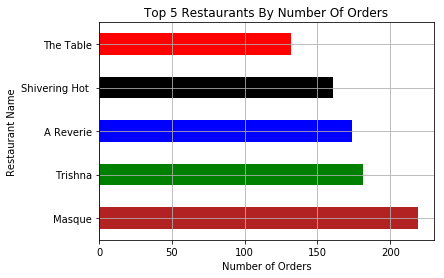

Punjabi     584
Bengali     470
Gujrati     298
Kashmiri    215
Tamil        77
Name: cuisine_type, dtype: int64


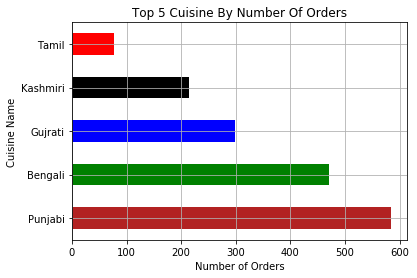

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64


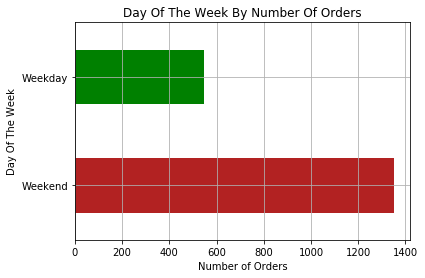

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64


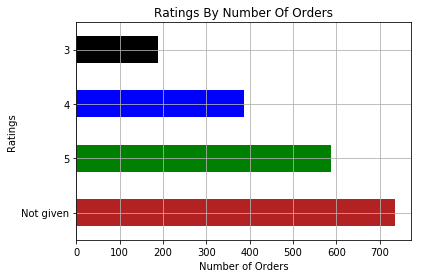

In [31]:
#Need to understand more as it's asking to draw graph on eash variable but not in any context
# Write the code here
df = pd.read_csv(r"C:\Users\njoshi3\Desktop\DS POC\Zomato_order.csv")
#----------Restaurant Name-------------------
df['restaurant_name'].value_counts().plot(kind='barh',color='salmon')
dfr=df['restaurant_name'].value_counts(ascending=False).head()
print(dfr)
dfr.head().plot(kind='barh',color=['firebrick', 'green', 'blue', 'black', 'red'],grid=True)
plt.ylabel("Restaurant Name")
plt.xlabel("Number of Orders")
plt.title("Top 5 Restaurants By Number Of Orders")
plt.show()
#df['restaurant_name'].value_counts(ascending=True).head().plot(kind='barh',color='salmon')
#----------cuisine_type-------------------
dfc=df['cuisine_type'].value_counts(ascending=False).head()
print(dfc)
dfc.head().plot(kind='barh',color=['firebrick', 'green', 'blue', 'black', 'red'],grid=True)
plt.ylabel("Cuisine Name")
plt.xlabel("Number of Orders")
plt.title("Top 5 Cuisine By Number Of Orders")
plt.show()
#df['cuisine_type'].value_counts(ascending=True).head().plot(kind='barh',color='salmon')
#----------Day Of The Week-------------------
dfd=df['day_of_the_week'].value_counts(ascending=False) #.head()
print(dfd)
dfd.head().plot(kind='barh',color=['firebrick', 'green', 'blue', 'black', 'red'],grid=True)
plt.ylabel("Day Of The Week")
plt.xlabel("Number of Orders")
plt.title("Day Of The Week By Number Of Orders")
plt.show()
#df['day_of_the_week'].value_counts(ascending=True).head().plot(kind='barh',color='salmon')
#----------Rating-------------------
dfrt=df['rating'].value_counts(ascending=False) #.head()
print(dfrt)
dfrt.head().plot(kind='barh',color=['firebrick', 'green', 'blue', 'black', 'red'],grid=True)
plt.ylabel("Ratings")
plt.xlabel("Number of Orders")
plt.title("Ratings By Number Of Orders")
plt.show()
#df['day_of_the_week'].value_counts(ascending=True).head().plot(kind='barh',color='salmon')

### Question 7: Write the code to find the top 5 restaurants that have received the highest number of orders. (1 mark)

In [32]:
# Write the code here
df = pd.read_csv(r"C:\Users\njoshi3\Desktop\DS POC\Zomato_order.csv")
#----------Restaurant Name-------------------
#df['restaurant_name'].value_counts().plot(kind='barh',color='salmon')
dfr=df['restaurant_name'].value_counts(ascending=False).head()
print(dfr)

Masque            219
Trishna           181
A Reverie         174
Shivering Hot     161
The Table         132
Name: restaurant_name, dtype: int64


#### Observations:
Masque got maximum orders 219, followed by Trishna 181, A Reverie 174, Shivering hot 161 and The Table 131

### Question 8: Write the code to find the most popular cuisine on weekends. (1 mark)

In [57]:
# Write the code here
df = pd.read_csv(r"C:\Users\njoshi3\Desktop\DS POC\Zomato_order.csv")
df = df.astype({"restaurant_name":'category',"cuisine_type":'category',"day_of_the_week":'category'})
dfc = df.copy()
dfc = dfc[dfc['day_of_the_week']=="Weekend"]
dfc = dfc.groupby('cuisine_type')['customer_id'].count().sort_values(ascending=False)
print(dfc.head(1))

cuisine_type
Punjabi    415
Name: customer_id, dtype: int64


In [121]:
df = pd.read_csv(r"C:\Users\njoshi3\Desktop\DS POC\Zomato_order.csv")
df = df.astype({"restaurant_name":'category',"cuisine_type":'category',"day_of_the_week":'category'})
#MOST Popular Cuisine = Groupby day_of_the_week and highest order no
#dfweekend = df['cuisine_type'][df['day_of_the_week']=='Weekend']
dfweekend = df[df['day_of_the_week']=='Weekend']
print("Top 5 Popular Cuisine Type and Order Counts :")
print(dfweekend['cuisine_type'].value_counts(ascending=False).head(5))
dfpunjabi = dfweekend[df['cuisine_type']=="Punjabi"]
print("Most Popular Punjabi Restaurant Name and Order Counts :")
print(dfpunjabi['restaurant_name'].value_counts(ascending=False).head(1))

Top 5 Popular Cuisine Type and Order Counts :
Punjabi     415
Bengali     335
Gujrati     207
Kashmiri    163
Tamil        53
Name: cuisine_type, dtype: int64
Most Popular Punjabi Restaurant Name and Order Counts :
Masque    145
Name: restaurant_name, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


#### Observations:
Punjabi is most popular cuisine type on weekend considering we get 415 records; highest from others.
And most popular Punjabi Restaurant Name is "Masque" with 145 order in weekend.

### Question 9: Write the code to find the number of total orders where the cost is above 200 INR. What is the percentage of such orders in the dataset?  (1 mark)

In [154]:
# Write the code here
#df.cost_of_the_order.max
df  = pd.read_csv(r"C:\Users\njoshi3\Desktop\DS POC\Zomato_order.csv")
totalorders = df.shape[0]
above200 = df[df['cost_of_the_order']>200].shape[0]
print("Total Number Of Orders :",totalorders)
print("Total Number Of Orders Above Rs 200 :",above200)
print("Percentage Of Orders Above Rs 200 Order :",(above200/totalorders)*100)

Total Number Of Orders : 1898
Total Number Of Orders Above Rs 200 : 555
Percentage Of Orders Above Rs 200 Order : 29.24130663856691


#### Observations:
Total Number Of Orders : 1898
Total Number Of Orders Above Rs 200 : 555
Percentage Of Orders Above Rs 200 Order : 29.24130663856691

### Question 10: Write the code to find the mean delivery time based on this dataset. (1 mark)

In [80]:
# Write the code here
df.delivery_time.mean()

24.161749209694417

#### Observations:
Mean Delivery Time from all the orders is 24.16; means each delivery is done before 25 minutes.

### Question 11: Suppose the company has decided to give a free coupon of 150 INR to the customer who has spent the maximum amount on a single order. Write the code to find the ID of the customer along with the order details. (1 mark)

In [88]:
#write the code here
df = pd.read_csv(r"C:\Users\njoshi3\Desktop\DS POC\Zomato_order.csv") 
df = df.astype({"restaurant_name":'category',"cuisine_type":'category',"day_of_the_week":'category'})
df['cost_of_the_order'].nlargest(n=1)
dflargest = df['cost_of_the_order'].max()
print("Cost Of Order Maximum :",dflargest)
# Now, fetching other details of largest order
print(df[df['cost_of_the_order']==df['cost_of_the_order'].max()])
print("--------- Or--------")
print(df[df['cost_of_the_order']==dflargest])
print("--------- Or--------")
maxcustid = df['customer_id'][df['cost_of_the_order']==dflargest]
print("Customer Id For Max Order Value :",maxcustid)
#Why the 573 (record no may be) is getting displayed all the time ?

Cost Of Order Maximum : 354.1
     order_id  customer_id restaurant_name cuisine_type  cost_of_the_order  \
573   1477814        62359         Bukhara         Goan              354.1   

    day_of_the_week rating  food_preparation_time  delivery_time  
573         Weekday      4                     21             29  
--------- Or--------
     order_id  customer_id restaurant_name cuisine_type  cost_of_the_order  \
573   1477814        62359         Bukhara         Goan              354.1   

    day_of_the_week rating  food_preparation_time  delivery_time  
573         Weekday      4                     21             29  
--------- Or--------
Customer Id For Max Order Value : 573    62359
Name: customer_id, dtype: int64


#### Observations:
The biggest order value is 354.1 Rs. Placed by customer id 62359 at Bukhara Restaurant for Goan cuisine type in weekday.

### Question 12: Suppose the company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Write the code to find the restaurants fulfilling the criteria to get the promotional offer. (2 marks)

#### Observations:

In [84]:
# Write the code here
df = pd.read_csv(r"C:\Users\njoshi3\Desktop\DS POC\Zomato_order.csv")
df = df.astype({"restaurant_name":'category',"cuisine_type":'category',"day_of_the_week":'category'})
dfrating = df.copy()
dfrating = df.loc[df['rating']!="Not given"]
dfrating['ratcount']=0
dfrating.head(5)    
dfrestcnts = dfrating.groupby(['restaurant_name','rating'])['rating'].count().sort_values(ascending=False)
print(dfrestcnts)
#dfc = dfc.groupby('cuisine_type')['customer_id'].count().sort_values(ascending=False)

restaurant_name            rating
Masque                     5         60
The Table                  5         53
Trishna                    5         51
Masque                     4         50
Shivering Hot              5         44
A Reverie                  5         44
Trishna                    4         42
A Reverie                  4         39
Wasabi                     5         35
Shivering Hot              4         33
Bomra's                    5         32
Mughal Mahal               5         32
Olive Qutub                5         27
Bukhara                    5         26
Bomra's                    4         25
Megu                       5         25
Masque                     3         23
A Reverie                  3         23
Annamaya                   5         23
Mughal Mahal               4         21
The Table                  4         21
Karavalli                  5         21
Annamaya                   4         21
Gunpowder                  5         19
Toast 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Question 13: Suppose the company charges the restaurant 25% on the orders having cost greater than 200 INR and 15% on the orders having cost greater than 50 INR. Write the code to find the net revenue generated on all the orders given in the dataset. (2 marks)

In [183]:
# Write the code here
df = pd.read_csv(r"C:\Users\njoshi3\Desktop\DS POC\Zomato_order.csv") 
#df['revenue'] = df.apply(lambda row: row.cost_of_the_order*0.25 if df['cost_of_the_order']>200 else row.cost_of_the_order*0.15)
#df['revenue'] = lambda df['cost_of_the_order']: df['cost_of_the_order']*0.25 if df['cost_of_the_order']>200 else df['cost_of_the_order']*0.15
#Getting INVALID SYNTAX
#df['revenue'] = lambda df: df['cost_of_the_order']*0.25 if df['cost_of_the_order']>200 else df['cost_of_the_order']*0.15
#No SYNTAX Error, but result is not appropriate
df['revenue'] = np.where(df['cost_of_the_order']>200,df['cost_of_the_order']*0.25,df['cost_of_the_order']*0.15)
print("Total Revenue Generated :",df['revenue'].sum())

Total Revenue Generated : 61727.14


#### Observations:
Total revenue generated based on 25% and 15% revenue rate is 61727.14.
Column addtion based on Lambda function didn't work :), need to resolve.

### Question 14: Suppose the company wants to analyze the total time required to deliver the food. Write the code to find out the percentage of orders that have more than 60 minutes of total delivery time. (2 marks)

Note: The total delivery time is the summation of the food preparation time and delivery time. 

In [90]:
# Write the code here
df  = pd.read_csv(r"C:\Users\njoshi3\Desktop\DS POC\Zomato_order.csv")
df.groupby(['restaurant_name'])['delivery_time'].sum()/60

restaurant_name
A Reverie                    72.016667
Alidoro                       0.366667
Amma                          1.433333
Annamaya                     29.516667
Aurora                        0.733333
Balthazar Boulangerie         4.266667
Bareburger                   11.050000
Benihana                      2.033333
Bhatti Indian Grill           0.750000
Bomra's                      47.483333
Bomra's Bar & Grill          17.166667
Bomra's Izakaya              11.350000
Bukhara                      28.450000
Bukhara Tribeca               9.500000
Chote Nawab                   0.500000
Five Leaves                   1.483333
Frank Restaurant              0.516667
Friend of a Farmer            1.316667
Galli Restaurant              0.266667
Go! Go! Curry!                1.183333
Gunpowder                    28.966667
Haandi                        1.016667
Haveli Indian Restaurant      0.833333
Hot Kitchen                   0.883333
Junoon                        2.216667
Kanoyama 

#### Observations:


### Question 15: Suppose the company wants to analyze the delivery time of the orders on weekdays and weekends. Write the code to find the mean delivery time on weekdays and weekends. Write your observations on the results. (2 marks)

In [99]:
# Write the code here
df  = pd.read_csv(r"C:\Users\njoshi3\Desktop\DS POC\Zomato_order.csv")
df.groupby['day_of_the_week']delivery_time.mean()

SyntaxError: invalid syntax (<ipython-input-99-57d3731d57c7>, line 3)

#### Observations:


### Conclusion and Recommendations

### **Question 16:** Write the conclusions and business recommendations derived from the analysis. (4 marks)

#### Key Insights: